In [56]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

In [3]:
tf.__version__

'2.3.0'

In [57]:
import os
os.chdir('F:/Sandeep/SANDEEP DOCS/DLCVNLP/AirQualityUCI')

In [58]:
df = pd.read_csv('AirQualityUCI.csv')

In [59]:
df.drop(['Unnamed: 15', 'Unnamed: 16'],axis = 1,inplace = True)

In [60]:
df1 = df.dropna(axis=0, inplace=True)

In [61]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [62]:
df.shape

(9357, 15)

In [18]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04-04-2005,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04-04-2005,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04-04-2005,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04-04-2005,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04-04-2005,14:00:00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [63]:
X = df.drop(['AH','Date','Time'],axis =1)
y = df['AH']

In [39]:
y

0       0.7578
1       0.7255
2       0.7502
3       0.7867
4       0.7888
         ...  
9352    0.7568
9353    0.7119
9354    0.6406
9355    0.5139
9356    0.5028
Name: AH, Length: 9357, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_trainfull,X_test,y_traifull,y_test = train_test_split(X,y,random_state = 2, test_size=0.33)

In [66]:
X_train,X_valid,y_train,y_valid = train_test_split(X_trainfull,y_traifull,random_state = 2, test_size=0.33)

In [14]:
df.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### BASIC ANN MODEL 

In [68]:
layers = [(tf.keras.layers.Dense(128,activation = "relu",name ="hidden_lay1",input_shape = X_train.shape[1:])),
          (tf.keras.layers.Dense(320,activation = "relu",name = "hidden_lay2")),
          (tf.keras.layers.Dense(288,activation = "relu",name = "hidden_lay3")),
          (tf.keras.layers.Dense(384,activation = "relu",name = "hidden_lay4")),
          (tf.keras.layers.Dense(256,activation = "relu",name = "hidden_lay5")),
          (tf.keras.layers.Dense(192,activation = "relu",name = "hidden_lay6")),
          (tf.keras.layers.Dense(384,activation = "relu",name = "hidden_lay7")),
          (tf.keras.layers.Dense(96,activation = "relu",name = "hidden_lay8")),
          (tf.keras.layers.Dense(480,activation = "relu",name = "hidden_lay9")),
          (tf.keras.layers.Dense(128,activation = "relu",name = "hidden_lay10")),
          (tf.keras.layers.Dense(160,activation = "relu",name = "hidden_lay11")),
          (tf.keras.layers.Dense(384,activation = "relu",name = "hidden_lay12")),
          (tf.keras.layers.Dense(128,activation = "relu",name = "hidden_lay13")),
          (tf.keras.layers.Dense(1))
          
          
        ]


In [69]:
model = tf.keras.models.Sequential(layers)

In [70]:
model.compile(loss="mse",optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics = ['MSE'])
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb])

Epoch 1/15
132/132 [==============================] - 1s 9ms/step - loss: 207.9544 - MSE: 207.9544 - val_loss: 0.3101 - val_MSE: 0.3101
Epoch 2/15
132/132 [==============================] - 1s 5ms/step - loss: 1.4336 - MSE: 1.4336 - val_loss: 0.7095 - val_MSE: 0.7095
Epoch 3/15
132/132 [==============================] - 1s 9ms/step - loss: 0.6184 - MSE: 0.6184 - val_loss: 0.2229 - val_MSE: 0.2229
Epoch 4/15
132/132 [==============================] - 1s 5ms/step - loss: 119.1154 - MSE: 119.1154 - val_loss: 25.3014 - val_MSE: 25.3014
Epoch 5/15
132/132 [==============================] - 1s 5ms/step - loss: 14.2986 - MSE: 14.2986 - val_loss: 16.3964 - val_MSE: 16.3964
Epoch 6/15
132/132 [==============================] - 1s 5ms/step - loss: 525.0325 - MSE: 525.0325 - val_loss: 5.2487 - val_MSE: 5.2487
Epoch 7/15
132/132 [==============================] - 1s 5ms/step - loss: 35.4890 - MSE: 35.4890 - val_loss: 1.6312 - val_MSE: 1.6312
Epoch 8/15
132/132 [==============================] - 1s

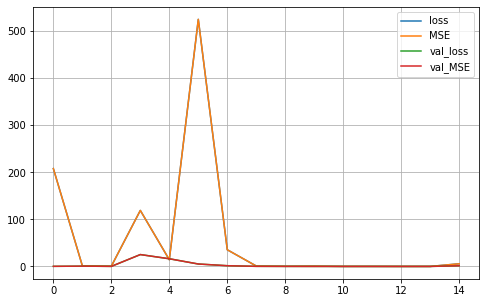

In [71]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [72]:
mse_test = model.evaluate(X_test, y_test)

97/97 [==============================] - 0s 1ms/step - loss: 1.2335 - MSE: 1.2335


In [73]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[1.7785765],
       [1.7708486],
       [1.626618 ]], dtype=float32)

In [57]:
X_test[:3]

array([[ 0.49465099,  1.2265512 , -0.29693671,  0.43010162,  1.15672005,
         1.14353762, -0.94135191,  0.41178055,  1.06160127,  1.17163828,
         0.2803192 ,  0.56151062],
       [ 0.4600455 , -0.22552127, -0.29693671,  0.10993719, -0.16924748,
        -0.4693713 ,  0.19172768,  0.08082214,  0.41233695, -0.88755723,
         0.63140896, -0.20782688],
       [ 0.48696088,  0.61079895, -0.29693671,  0.36606874,  0.92983227,
         0.56833155, -0.62113376,  0.71909907,  0.86249355,  0.57734437,
         0.38164041,  0.17287622]])

In [63]:
y_test[:3]

5381    1.7699
3599    1.8037
4730    1.6256
Name: AH, dtype: float64

### ANN MODEL WITH KERAS TUNER SO THAT IT CAN AUTOMATICALLY GET THE OPTIMUM NUMBER OF HIDDEN LAYERS AND RESPECTIVE NEURONS IN THEM

In [33]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [40]:
#hp.Int is use to select part
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),activation = "relu"))
        model.add(layers.Dense(units = 1))
        model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2, 1e-3, 1e-4])), loss = 'mse',metrics=['MSE'])
    return model

In [41]:
tuner = RandomSearch(
    build_model,
    objective='val_MSE',
    max_trials=3,
    executions_per_trial=1,
    directory='my_dir',
    project_name='AQI')

In [36]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}


#### Then, start the search for the best hyperparameter configuration. The call to search has the same signature as model.fit()

In [42]:
model1 = tuner.search(X_train, y_train,
             epochs=3,
             validation_data=(X_valid, y_valid))
model1

Trial 3 Complete [00h 00m 01s]
val_MSE: 0.11202651262283325

Best val_MSE So Far: 0.11202651262283325
Total elapsed time: 00h 00m 06s
INFO:tensorflow:Oracle triggered exit


In [49]:
models = tuner.get_best_models(num_models=2)

In [52]:
tuner.results_summary()

Results summary
Results in my_dir\AQI
Showing 10 best trials
Objective(name='val_MSE', direction='min')
Trial summary
Hyperparameters:
num_layers: 4
units_0: 128
learning_rate: 0.001
units_1: 320
units_2: 288
units_3: 384
units_4: 256
units_5: 192
units_6: 384
units_7: 96
units_8: 480
units_9: 128
units_10: 160
units_11: 384
units_12: 128
Score: 0.11202651262283325
Trial summary
Hyperparameters:
num_layers: 5
units_0: 192
learning_rate: 0.01
units_1: 128
units_2: 96
units_3: 32
units_4: 512
units_5: 480
units_6: 352
units_7: 64
units_8: 160
units_9: 96
units_10: 224
units_11: 416
units_12: 352
Score: 0.3456842303276062
Trial summary
Hyperparameters:
num_layers: 13
units_0: 128
learning_rate: 0.0001
units_1: 352
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
Score: 1546.1419677734375


#### SELECTING BEST MODEL AND ITS RESPECTIVE LAYERS AND NEURON AND THEN MAKE YOUR NN , IN THIS WAY WE WILL GET MAX EFFICIENCY , THIS IS WHAT I HAVE DONE


#### SElecting this result from best models and taken this number of neurons learning rate and layers then i got less MSE
num_layers: 4
units_0: 128
learning_rate: 0.001
units_1: 320
units_2: 288
units_3: 384
units_4: 256
units_5: 192
units_6: 384
units_7: 96
units_8: 480
units_9: 128
units_10: 160
units_11: 384
units_12: 128
Score: 0.11202651262283325